In [12]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set visualization styles
sns.set(style="whitegrid")

# Load the Dataset

In [ ]:
train = pd.read_csv('train.csv')
test_data = pd.read_csv("test.csv")

# 1. Basic Overview

In [ ]:
print("\n--- First 5 Rows ---\n")
print(train.head())


--- First 5 Rows ---

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0

In [ ]:
print("\n--- First 5 Rows ---\n")
print(test_data.head())


--- First 5 Rows ---

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [7]:
print("\n--- Dataset Info ---\n")
print(train.info())


--- Dataset Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
print("\n--- Statistical Summary ---\n")
print(train.describe())


--- Statistical Summary ---

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [9]:
print("\n--- Checking Missing Values ---\n")
print(train.isnull().sum())


--- Checking Missing Values ---

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# 🛠 Fill missing values after checking

In [13]:
# Fill missing Age values with median
train['Age'] = train['Age'].fillna(train['Age'].median())

In [14]:
# Fill missing Embarked values with mode
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [16]:
# Check again if missing values are gone
print("\n--- Missing Values After Filling ---\n")
print(train.isnull().sum())


--- Missing Values After Filling ---

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [55]:
# Optional Drop 'Cabin' column
train = train.drop('Cabin', axis=1)

# 3. Univariate Analysis

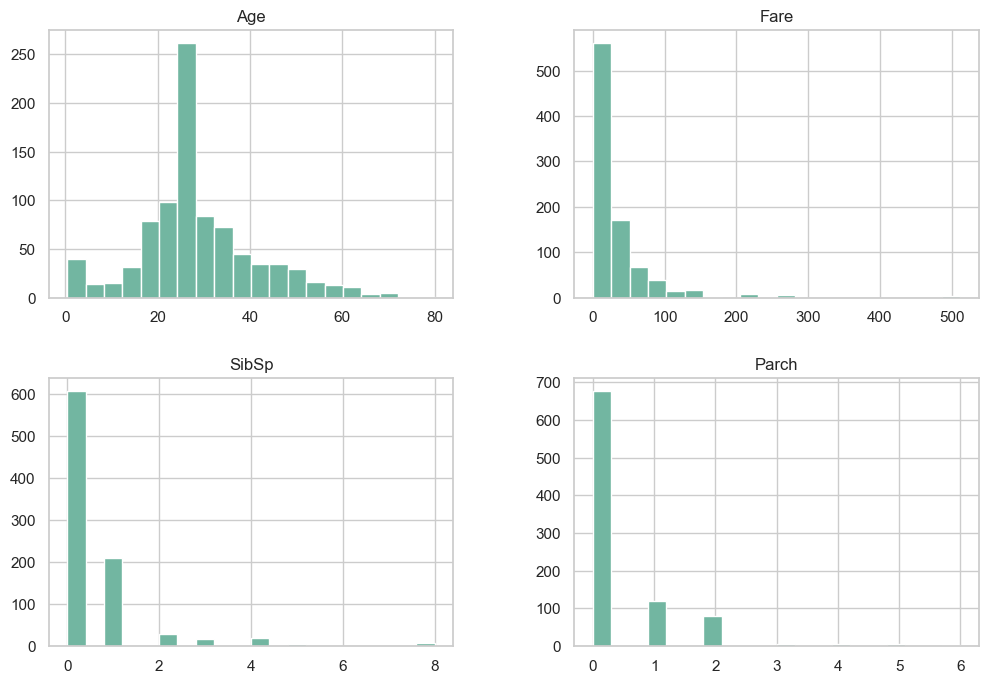

In [29]:
# Plot histograms for numerical features
train[['Age','Fare','SibSp','Parch']].hist(bins=20, figsize=(12,8),color='#72b6a1')
plt.show()

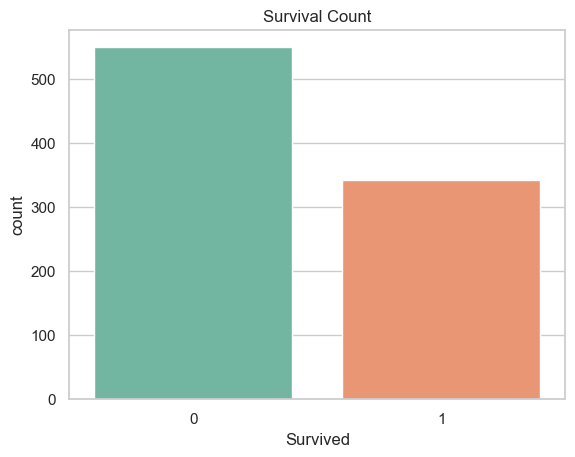

In [19]:
## Survived Count
sns.countplot(data=train, x='Survived', hue='Survived', palette='Set2', legend=False)
plt.title('Survival Count')
plt.show()


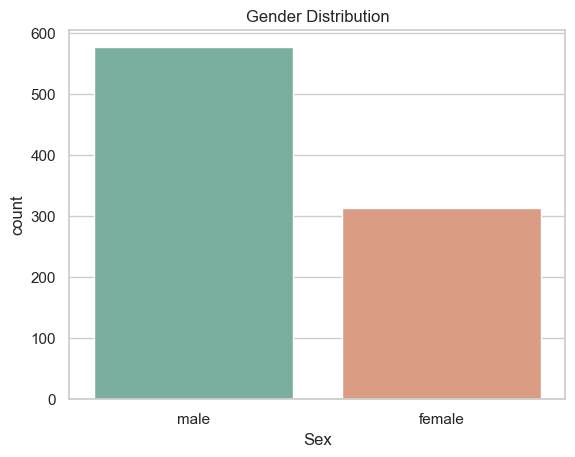

In [32]:
## Gender Distribution
sns.countplot(data=train, x='Sex', hue='Sex', palette={'male': '#72b6a1', 'female': '#e99675'}, legend=False)
plt.title('Gender Distribution')
plt.show()

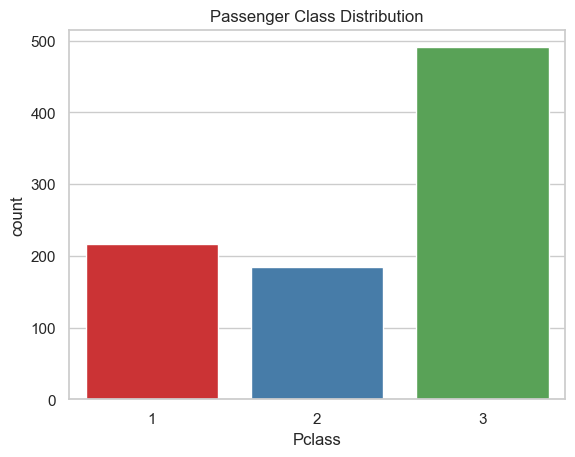

In [34]:
## Passenger Class
sns.countplot(data=train, x='Pclass', hue='Pclass', palette='Set1', legend=False)
plt.title('Passenger Class Distribution')
plt.show()

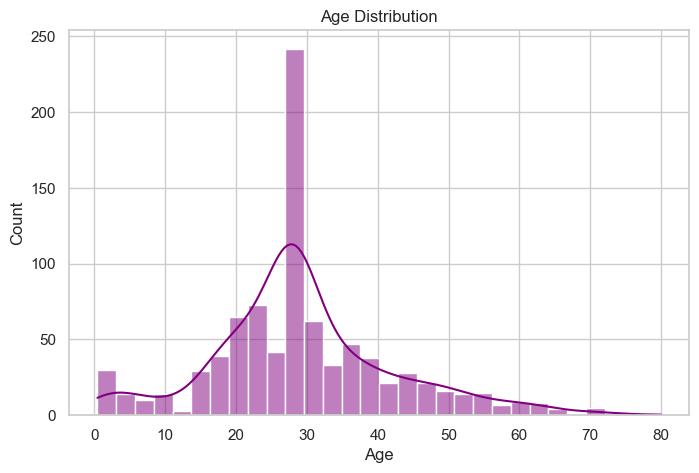

In [35]:
## Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(train['Age'].dropna(), kde=True, color='purple')
plt.title('Age Distribution')
plt.show()


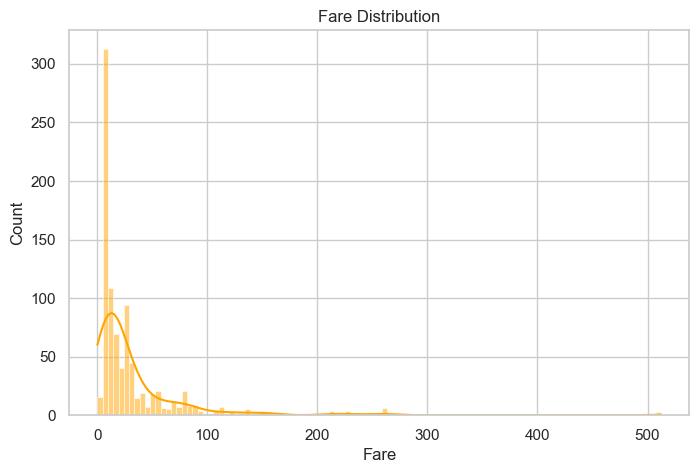

In [36]:
## Fare Distribution
plt.figure(figsize=(8,5))
sns.histplot(train['Fare'], kde=True, color='orange')
plt.title('Fare Distribution')
plt.show()

# 4. Bivariate Analysis

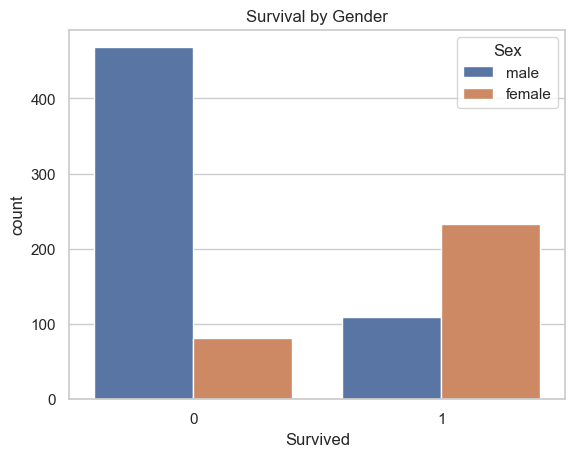

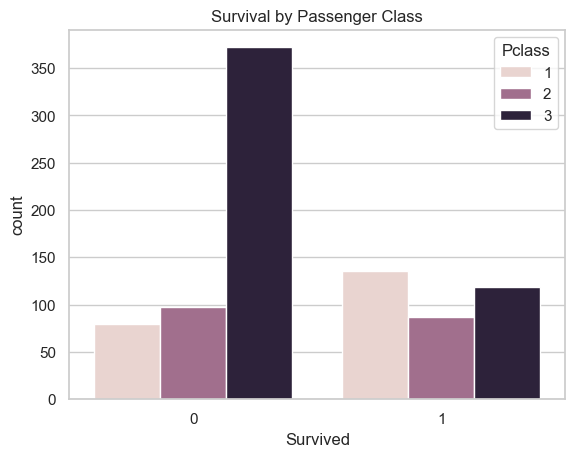

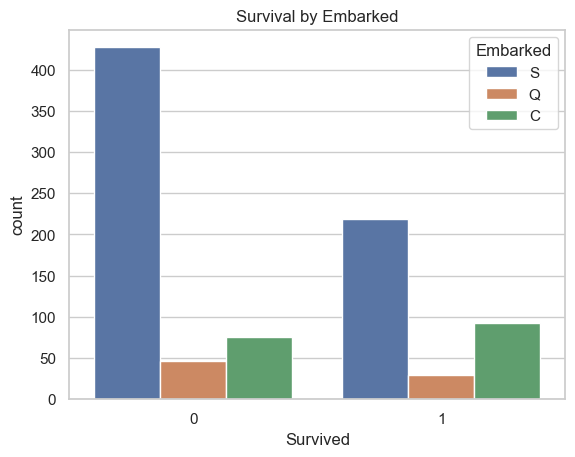

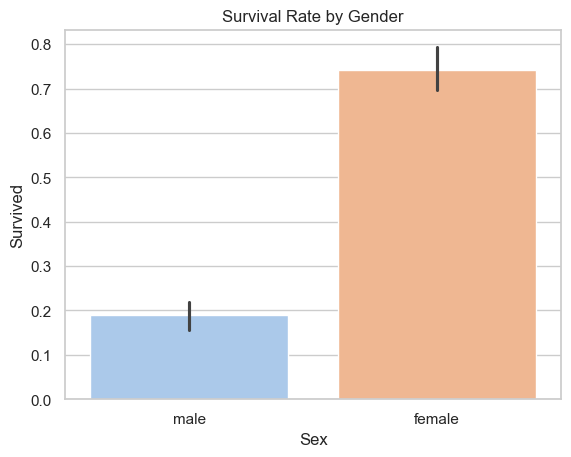

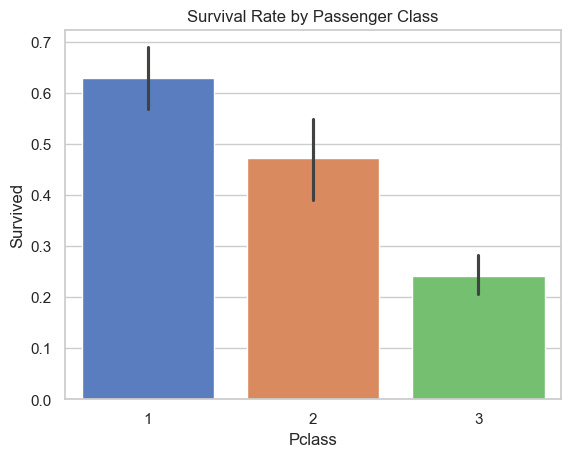

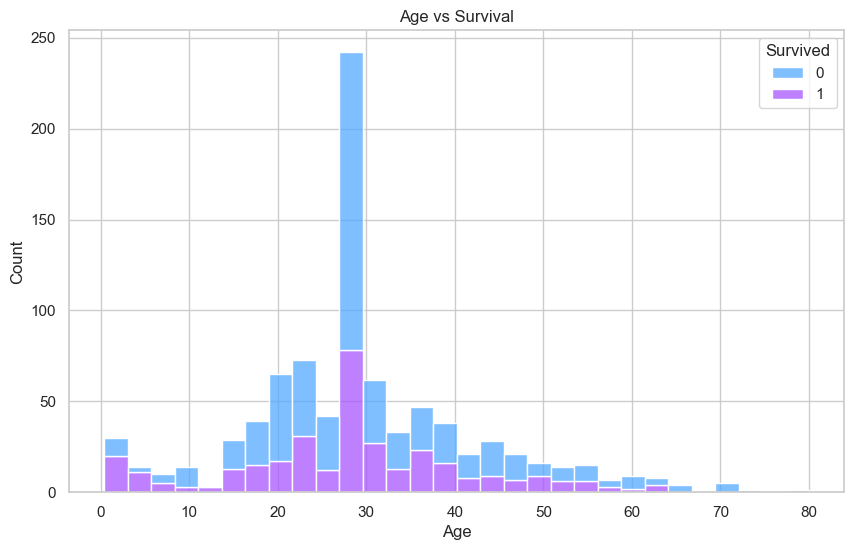

In [43]:
# 1. Categorical vs. Survived (Countplots)
# Survival by Gender
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title('Survival by Gender')
plt.show()

# Survival by Passenger Class
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.title('Survival by Passenger Class')
plt.show()

# Survival by Embarked
sns.countplot(x='Survived', hue='Embarked', data=train)
plt.title('Survival by Embarked')
plt.show()

# 2. Survival Rate by Gender (Barplot)
# Now using hue='Sex' to avoid FutureWarning
sns.barplot(data=train, x='Sex', y='Survived', hue='Sex', palette='pastel', legend=False)
plt.title('Survival Rate by Gender')
plt.show()

# 3. Survival Rate by Passenger Class (Barplot)
# Now using hue='Pclass' to avoid FutureWarning
sns.barplot(data=train, x='Pclass', y='Survived', hue='Pclass', palette='muted', legend=False)
plt.title('Survival Rate by Passenger Class')
plt.show()

# 4. Age vs Survival (Histogram)
plt.figure(figsize=(10,6))
sns.histplot(data=train, x='Age', hue='Survived', multiple='stack', palette='cool')
plt.title('Age vs Survival')
plt.show()


# 5. Multivariate Analysis


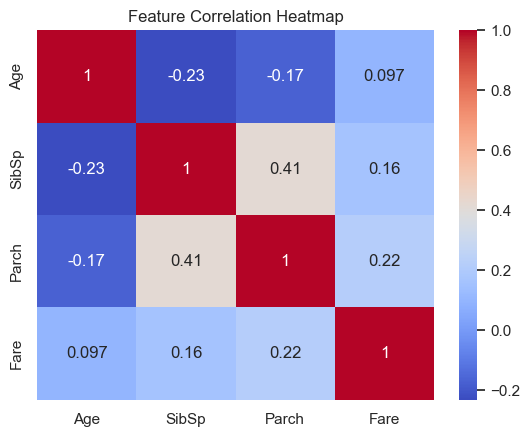

In [49]:
## Heatmap (Correlation)
corr_matrix = train[['Age','SibSp','Parch','Fare']].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


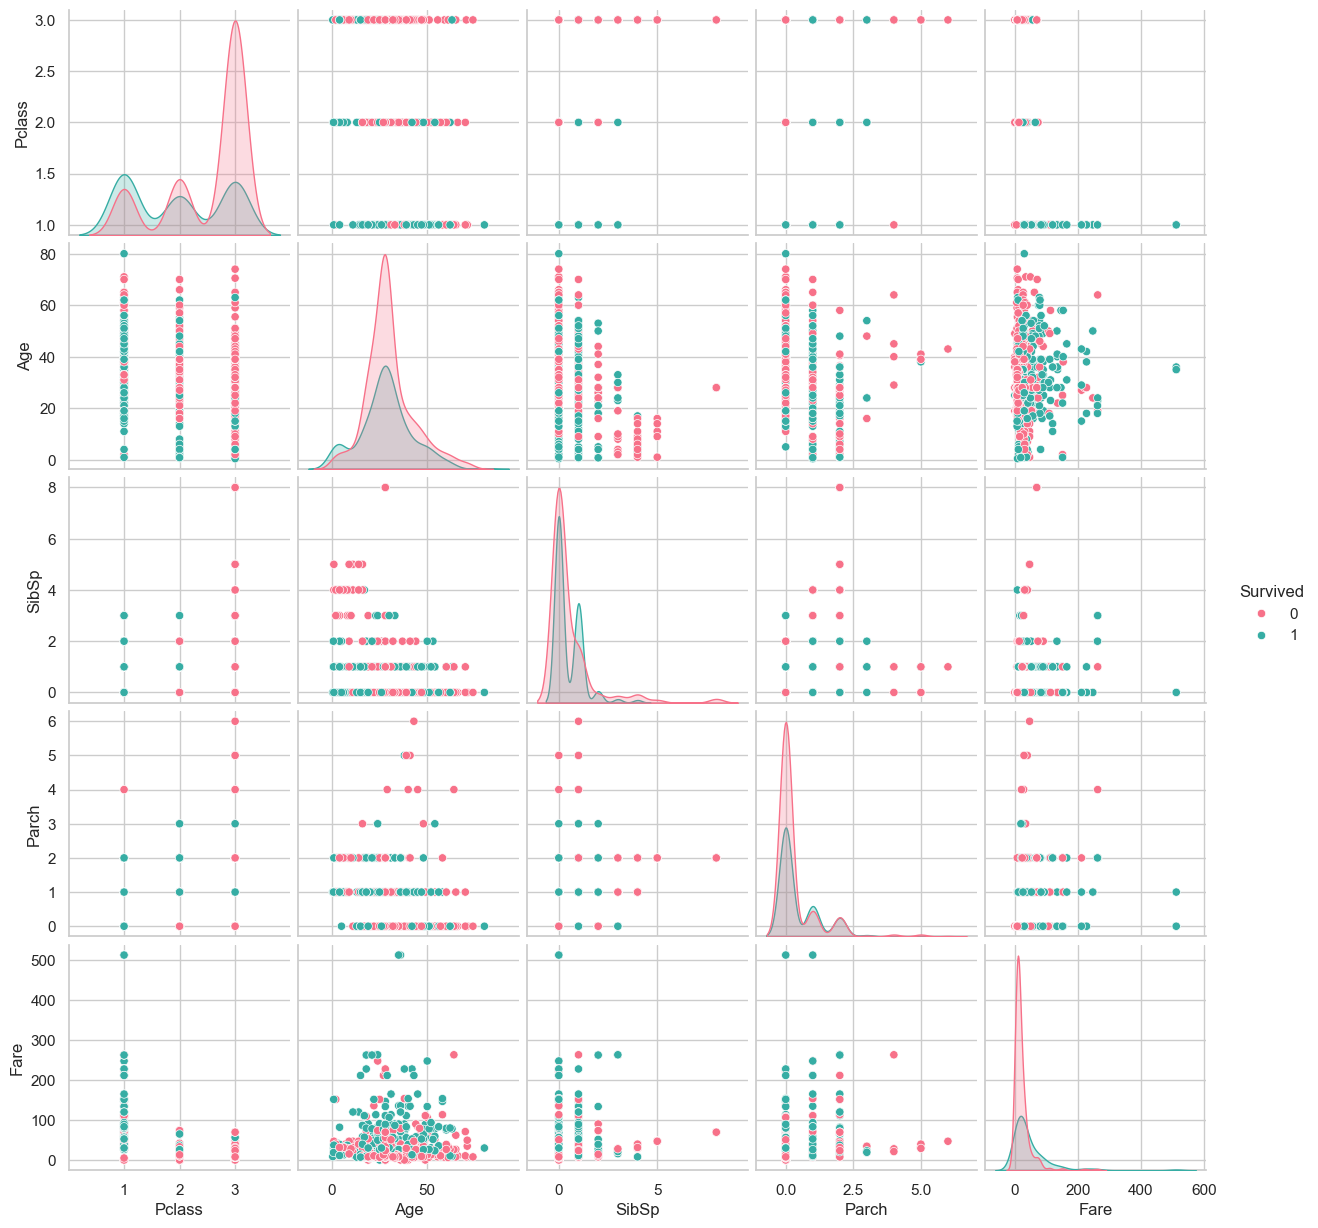

In [50]:
sns.pairplot(train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], hue='Survived', palette='husl')
plt.show()

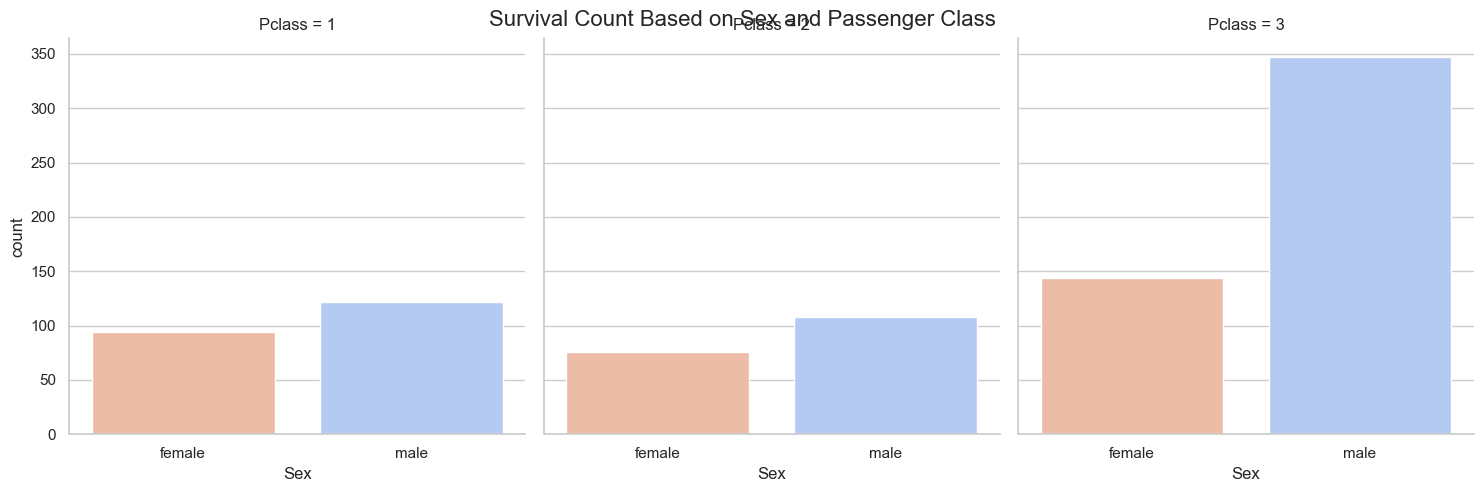

In [54]:
# FacetGrid for Survival based on Pclass and Sex 
sns.catplot(
    data=train,
    x="Sex",
    kind="count",
    col="Pclass",
    order=["female", "male"],  
    hue="Sex",  
    palette="coolwarm",  
    legend=False  
)
plt.suptitle("Survival Count Based on Sex and Passenger Class", fontsize=16)
plt.show()

# 6. Observations and Summary

In [56]:
print("""
--- Observations and Insights ---

1. **Missing Values**:
   - 'Age' had missing values filled with median.
   - 'Embarked' missing values were filled with mode.
   - 'Cabin' was dropped due to too many missing entries (~77%).

2. **Survival Rates**:
   - Overall, about 38% passengers survived and 62% did not.
   - Females had a much higher survival rate compared to males.

3. **Gender Impact**:
   - Gender played a significant role — women had a better chance of survival.

4. **Passenger Class**:
   - First-class passengers had the highest survival rate.
   - Third-class passengers had the lowest survival rate.

5. **Age Factor**:
   - Children (0-10 years) had relatively better survival rates.
   - Older people (>60 years) had lower chances of survival.

6. **Fare Analysis**:
   - Higher fare paying passengers tended to survive more often.

7. **Correlation Insights**:
   - 'Fare' is positively correlated with survival.
   - 'Pclass' is negatively correlated with survival (higher class = better survival).

8. **Embarked Port Impact**:
   - Passengers who boarded from port 'C' (Cherbourg) had a slightly higher survival rate.

--- End of Analysis ---
""")


--- Observations and Insights ---

1. **Missing Values**:
   - 'Age' had missing values filled with median.
   - 'Embarked' missing values were filled with mode.
   - 'Cabin' was dropped due to too many missing entries (~77%).

2. **Survival Rates**:
   - Overall, about 38% passengers survived and 62% did not.
   - Females had a much higher survival rate compared to males.

3. **Gender Impact**:
   - Gender played a significant role — women had a better chance of survival.

4. **Passenger Class**:
   - First-class passengers had the highest survival rate.
   - Third-class passengers had the lowest survival rate.

5. **Age Factor**:
   - Children (0-10 years) had relatively better survival rates.
   - Older people (>60 years) had lower chances of survival.

6. **Fare Analysis**:
   - Higher fare paying passengers tended to survive more often.

7. **Correlation Insights**:
   - 'Fare' is positively correlated with survival.
   - 'Pclass' is negatively correlated with survival (higher cl